In [1]:
import os
os.chdir("../../")

In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import joblib


### Fonction

In [3]:
def group_accent(accent):
    accent = accent.lower()
    
    if any(x in accent for x in ["united states", "us", "california", "maine", "washington", "midwestern", "ohio", "iowa"]):
        return "American English"
    elif any(x in accent for x in ["england", "british", "yorkshire", "sussex", "welsh", "received pronunciation"]):
        return "British English"
    elif "scottish" in accent:
        return "Scottish English"
    elif "irish" in accent or "northern irish" in accent:
        return "Irish English"
    elif "canadian" in accent or "quebec" in accent:
        return "Canadian English"
    elif "australian" in accent or "new zealand" in accent:
        return "Australian/NZ English"
    elif any(x in accent for x in ["india", "indian", "sri lanka", "pakistan", "bangladeshi", "tamil", "nepali"]):
        return "South Asian English"
    elif any(x in accent for x in ["nigerian", "kenyan", "ugandan", "rwandan", "southern african"]):
        return "African English"
    elif any(x in accent for x in ["german", "dutch", "swedish", "russian", "croatian", "slavic", "balkan", "european", "azerbaijani"]):
        return "European English"
    elif any(x in accent for x in ["arabic", "egyptian"]):
        return "Middle Eastern/Arabic English"
    elif any(x in accent for x in ["filipino", "malaysian", "thai", "bidayuh", "hong kong", "taiwan", "waray"]):
        return "Southeast Asian English"
    elif "brazil" in accent:
        return "Latin American English"
    elif "mid-atlantic" in accent or "awful" in accent or "mixed" in accent:
        return "Other"
    else:
        return "Other"

In [4]:
def histograme_occurence(nbr_occurences = 100):
    

    df = pd.read_csv('data/En/processed/Common Voice.csv')
    df = df.dropna(subset=['wav_path', 'accents'])
    df["accent_group"] = df["accents"].apply(group_accent)
    df = df[df["accent_group"] != "Other"]
    df.reset_index(drop=True, inplace=True)

    accent_counts = df['accent_group'].value_counts()
    filtered_counts = accent_counts[accent_counts >= nbr_occurences]

    plt.figure(figsize=(10, 6))
    filtered_counts.plot(kind='bar', color='mediumseagreen')
    plt.title(f'Distribution des accents regroupés')
    plt.xlabel('Accent')
    plt.ylabel('Nombre d\'occurrences')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [5]:
def evaluation_accent(X_train, y_train, X_test, y_test, label_encoder, model=LogisticRegression(solver='lbfgs', max_iter=1000)):


    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print(confusion_matrix(y_test, y_pred))

In [20]:
def evaluation_accent_random_search(X_train, y_train, X_test, y_test, label_encoder, model, param_grid):
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=20,                
        scoring='f1_weighted',    
        cv=3,                     
        verbose=1,
        n_jobs=-1,                
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("Meilleurs paramètres trouvés :", random_search.best_params_)

    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print(confusion_matrix(y_test, y_pred))
    
    return random_search

# Prétraitement

In [7]:
OCCURENCES = 1

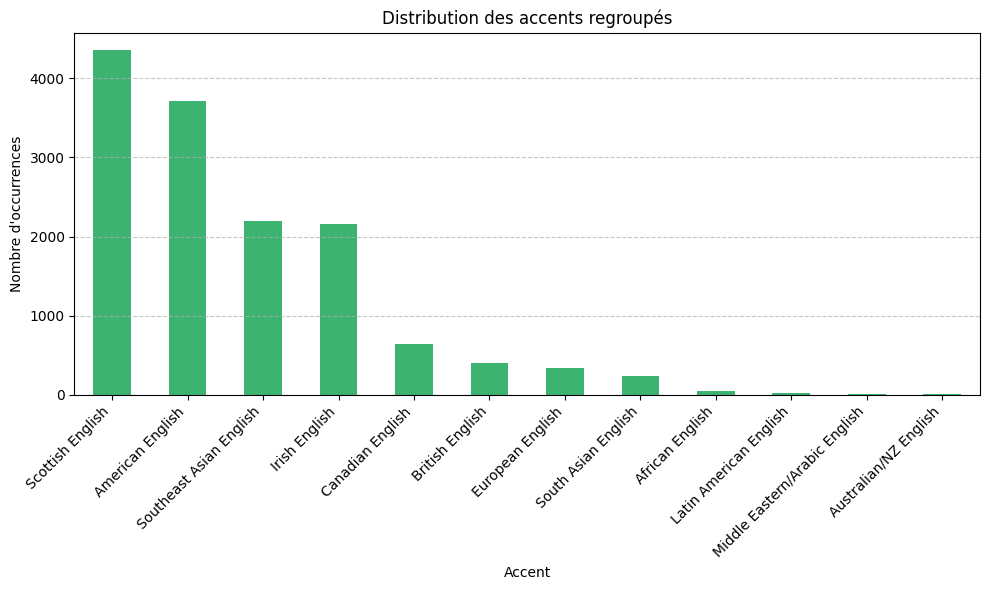

In [8]:
histograme_occurence(nbr_occurences = OCCURENCES )

In [9]:
df = pd.read_csv('data/En/processed/spectrogram_final.csv')
df = df.dropna(subset=['wav_path', 'accents'])
df["accent_group"] = df["accents"].apply(group_accent)
df = df[df["accent_group"] != "Other"]
df.reset_index(drop=True, inplace=True)
df = df.drop("wav_path", axis=1)
df = df.drop("accents", axis=1)
    


df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2391,2392,2393,2394,2395,2396,2397,2398,2399,accent_group
0,-0.519563,-0.192489,-0.250959,-0.360196,-0.444789,-0.740162,-0.740162,-0.740162,-0.740162,-0.740162,...,-0.740162,-0.740162,-0.740162,-0.740162,-0.740162,-0.740162,-0.740162,-0.740162,-0.740162,American English
1,-0.513154,-0.220268,-0.447714,-0.262794,-0.412808,-0.749071,-0.749248,-0.749248,-0.749248,-0.749248,...,-0.749248,-0.749248,-0.749248,-0.749248,-0.749248,-0.749248,-0.749248,-0.749248,-0.749248,American English
2,-0.601487,-0.183391,-0.356759,-0.350651,-0.453565,-0.717125,-0.718132,-0.718132,-0.718132,-0.718132,...,-0.718132,-0.718132,-0.718132,-0.718132,-0.718132,-0.718132,-0.718132,-0.718132,-0.718132,American English
3,-0.808931,-0.359229,-0.361124,-0.289793,-0.233526,-0.814916,-0.814916,-0.814916,-0.814916,-0.814916,...,-0.814916,-0.814916,-0.814916,-0.814916,-0.814916,-0.814916,-0.814916,-0.814916,-0.814916,American English
4,-0.531712,-0.316829,-0.330603,-0.467616,-0.188725,-0.618970,-0.726849,-0.726849,-0.726849,-0.726849,...,-0.726849,-0.726849,-0.726849,-0.726849,-0.726849,-0.726849,-0.726849,-0.726849,-0.726849,American English


In [10]:
X = df.drop("accent_group", axis=1)  
y = df["accent_group"] 

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
print("X_train shape:", y_train.shape)
print("X_test shape:", y_test.shape)

X_train shape: (11324,)
X_test shape: (2832,)


In [12]:
accents1 = sorted(set(y_train))
print(len(accents1))

accents1 = sorted(set(y_test))
print(len(accents1))

accents1 = sorted(set(y))
print(len(accents1))

12
12
12


In [13]:
valeurs, comptes = np.unique(y, return_counts=True)

print("Train:")
for label, count in zip(label_encoder.classes_, comptes):
    print(f"Classe {label} : {count} occurrences")
    
valeurs, comptes = np.unique(y_test, return_counts=True)

print("Test:")
for label, count in zip(label_encoder.classes_, comptes):
    print(f"Classe {label} : {count} occurrences")

Train:
Classe African English : 45 occurrences
Classe American English : 3718 occurrences
Classe Australian/NZ English : 5 occurrences
Classe British English : 406 occurrences
Classe Canadian English : 648 occurrences
Classe European English : 338 occurrences
Classe Irish English : 2162 occurrences
Classe Latin American English : 23 occurrences
Classe Middle Eastern/Arabic English : 10 occurrences
Classe Scottish English : 4356 occurrences
Classe South Asian English : 242 occurrences
Classe Southeast Asian English : 2203 occurrences
Test:
Classe African English : 7 occurrences
Classe American English : 724 occurrences
Classe Australian/NZ English : 1 occurrences
Classe British English : 84 occurrences
Classe Canadian English : 127 occurrences
Classe European English : 61 occurrences
Classe Irish English : 447 occurrences
Classe Latin American English : 3 occurrences
Classe Middle Eastern/Arabic English : 3 occurrences
Classe Scottish English : 861 occurrences
Classe South Asian English

# Evaluation

In [14]:
dict_of_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42,class_weight='balanced')
}


In [17]:
for name, model in dict_of_models.items():
    print(f"{name} model :")
    evaluation_accent(X_train, y_train, X_test, y_test,label_encoder, model=model)

Logistic Regression model :
                               precision    recall  f1-score   support

              African English       0.08      0.29      0.12         7
             American English       0.92      0.64      0.76       724
        Australian/NZ English       0.33      1.00      0.50         1
              British English       0.31      0.57      0.40        84
             Canadian English       0.90      0.94      0.92       127
             European English       0.51      0.89      0.65        61
                Irish English       0.96      0.99      0.97       447
       Latin American English       0.50      1.00      0.67         3
Middle Eastern/Arabic English       0.00      0.00      0.00         3
             Scottish English       1.00      0.99      1.00       861
          South Asian English       0.23      0.57      0.32        49
      Southeast Asian English       0.97      0.95      0.96       465

                     accuracy                  

# Optimisation des hyperparamètres

In [30]:
param_distributions = {
    "Logistic Regression": {
        "C": np.logspace(-3, 3, 10),           
        "penalty": ["l2"],    
        "max_iter": [1000]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200, 500],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}


for name, model in dict_of_models.items():
    print(f"{name} :")
    search = evaluation_accent_random_search(
        X_train, y_train, X_test, y_test,
        label_encoder,
        model=model,
        param_grid=param_distributions[name]
    )
    
    # Enregistrement
    best_model = search.best_estimator_
    joblib.dump(best_model, f"notebooks/Accents/model/{name}.pkl")


Logistic Regression :
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs paramètres trouvés : {'penalty': 'l2', 'max_iter': 1000, 'C': np.float64(215.44346900318823)}
                               precision    recall  f1-score   support

              African English       0.07      0.14      0.09         7
             American English       0.90      0.66      0.76       724
        Australian/NZ English       1.00      1.00      1.00         1
              British English       0.29      0.54      0.38        84
             Canadian English       0.82      0.91      0.86       127
             European English       0.62      0.89      0.73        61
                Irish English       0.95      0.99      0.97       447
       Latin American English       0.60      1.00      0.75         3
Middle Eastern/Arabic English       0.00      0.00      0.00         3
             Scottish English       1.00      1.00      1.00       861
          South Asian English  

# Enregistrement et Réutilisation des modèles

In [31]:
import joblib

joblib.dump(label_encoder, "notebooks/Accents/model/label_encoder.pkl")

['notebooks/Accents/model/label_encoder.pkl']

In [55]:
import whisper
import pandas as pd
import numpy as np
import torch.nn as nn



metadata = pd.read_csv('data/En/processed/Common Voice.csv')
metadata = metadata.dropna(subset=['wav_path', 'accents'])
metadata["accent_group"] = metadata["accents"].apply(group_accent)
metadata = metadata[metadata["accent_group"] != "Other"]
metadata.reset_index(drop=True, inplace=True)
metadata = metadata.drop("accents", axis=1)
metadata = metadata[["wav_path", "accent_group"]]
    


metadata.head(5)

,wav_path,accent_group
0,common_voice_en_40865211.wav,American English
1,common_voice_en_40865212.wav,American English
2,common_voice_en_40865213.wav,American English
3,common_voice_en_40865214.wav,American English
4,common_voice_en_40865215.wav,American English


In [56]:
def pred_accent(file_path, model):
    
    model_encode = whisper.load_model("tiny")
    
    kernel_size=100
    stride=100

    l=[]
    audio = whisper.load_audio(file_path)
    audio = whisper.pad_or_trim(audio)
    mel = whisper.log_mel_spectrogram(audio, n_mels=model_encode.dims.n_mels).to(model_encode.device)
    pool = nn.AvgPool1d(kernel_size=kernel_size, stride=stride)
    mel_pooled = pool(mel).squeeze(1)
    mel_numpy = mel_pooled.cpu().numpy()
    flat_array = mel_numpy.flatten()
    l.append(flat_array)

    row = np.random.rand((mel.shape[0]*mel.shape[1])//kernel_size)
    df = pd.DataFrame([row])
    df = df.drop(0)

    new_row = pd.DataFrame(l)
    df = pd.concat([df, new_row], ignore_index=True)
    df

    y_pred = model.predict(df)
    y_pred_proba = model.predict_proba(df)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    return y_pred_labels[0] ,np.max(y_pred_proba),y_pred_proba

In [57]:
modele_charge_lr = joblib.load('notebooks/Accents/model/Logistic Regression.pkl')

In [58]:
pred_accent(file_path = f'clips_en.wav/{metadata["wav_path"].iloc[5]}' , model=modele_charge_lr)

('British English',
 np.float64(0.8560165214414234),
 array([[3.10396917e-07, 8.03281740e-02, 3.63691000e-12, 8.56016521e-01,
         1.16122556e-03, 1.85731804e-05, 1.45765061e-04, 1.46340240e-20,
         4.44880601e-12, 1.18874422e-09, 6.07516223e-02, 1.57780688e-03]]))

In [59]:
modele_charge_rf = joblib.load('notebooks/Accents/model/Random Forest.pkl')

In [60]:
pred_accent(file_path = f'clips_en.wav/{metadata["wav_path"].iloc[5]}' , model=modele_charge_rf)

('American English',
 np.float64(0.432927729106662),
 array([[0.        , 0.43292773, 0.        , 0.12799636, 0.04304453,
         0.09375391, 0.15753211, 0.        , 0.        , 0.02996282,
         0.05420167, 0.06058087]]))